In [ ]:
import tensorflow_datasets as tfds

div2k_data = tfds.image.Div2k(config="bicubic_x4")
div2k_data.download_and_prepare()



EXTRACTING {'train_lr_url': 'https://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_LR_bicubic_X4.zip', 'valid_lr_url': 'https://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_valid_LR_bicubic_X4.zip', 'train_hr_url': 'https://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_HR.zip', 'valid_hr_url': 'https://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_valid_HR.zip'}


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/800 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/div2k/bicubic_x4/2.0.0.incompleteWCMVDB/div2k-train.tfrecord*...:   0%|   …

Generating validation examples...:   0%|          | 0/100 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/div2k/bicubic_x4/2.0.0.incompleteWCMVDB/div2k-validation.tfrecord*...:   0…

Dataset div2k downloaded and prepared to /root/tensorflow_datasets/div2k/bicubic_x4/2.0.0. Subsequent calls will reuse this data.


In [ ]:
import imageio

def load_image(filepath):
    return imageio.imread(filepath) / 255.0  # Normalize to [0, 1]

# Example assuming your data is organized with LR (low-resolution) and HR (high-resolution) subfolders:
lr_image_paths = ["/root/tensorflow_datasets/downloads/extracted/ZIP.data.visi.ee.ethz.ch_cvl_DIV2_DIV2_trai_LR8Aa4N_TrUrgpCaoBR45tbRme786TIXlJHQydu3Bt3jo.zip/DIV2K_train_LR_bicubic"]  # List of LR image paths
hr_image_paths = ["/root/tensorflow_datasets/downloads/extracted/ZIP.data.visi.ee.ethz.ch_cvl_DIV2_DIV2_trai_HRnQucRj9uNbbGLMapMO4iJPZws0wd-EGldnD5rPD2wzU.zip/DIV2K_train_HR"]  # List of corresponding HR image paths


In [ ]:
from torch.utils.data import Dataset


class Div2KDataset(Dataset):
    def __init__(self, lr_image_paths, hr_image_paths, transform=None):
        self.lr_image_paths = lr_image_paths
        self.hr_image_paths = hr_image_paths
        self.transform = transform

    def __len__(self):
        return len(self.lr_image_paths)

    def __getitem__(self, idx):
        lr_image = load_image(self.lr_image_paths[idx])
        hr_image = load_image(self.hr_image_paths[idx])

        if self.transform is not None:
            lr_image = self.transform(lr_image)
            hr_image = self.transform(hr_image)

        return lr_image, hr_image


In [ ]:
import matplotlib.pyplot as plt

<ipython-input-22-a9b98c43ef24>:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  a = imageio.imread("/root/tensorflow_datasets/downloads/extracted/ZIP.data.visi.ee.ethz.ch_cvl_DIV2_DIV2_trai_HRnQucRj9uNbbGLMapMO4iJPZws0wd-EGldnD5rPD2wzU.zip/DIV2K_train_HR/0001.png")


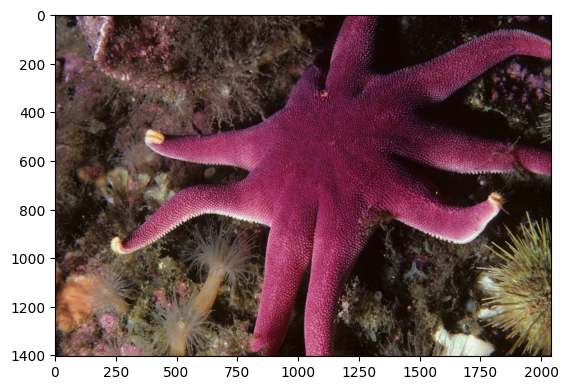

In [ ]:
a = imageio.imread("/root/tensorflow_datasets/downloads/extracted/ZIP.data.visi.ee.ethz.ch_cvl_DIV2_DIV2_trai_HRnQucRj9uNbbGLMapMO4iJPZws0wd-EGldnD5rPD2wzU.zip/DIV2K_train_HR/0001.png")


plt.imshow(a)
plt.show()

In [ ]:
img_tensor = torch.tensor(a, dtype=torch.float32)

In [ ]:
img_tensor.shape

torch.Size([1404, 2040, 3])

<ipython-input-27-bd2d7c9c4876>:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  a = imageio.imread("/root/tensorflow_datasets/downloads/extracted/ZIP.data.visi.ee.ethz.ch_cvl_DIV2_DIV2_trai_HRnQucRj9uNbbGLMapMO4iJPZws0wd-EGldnD5rPD2wzU.zip/DIV2K_train_HR/0001.png")


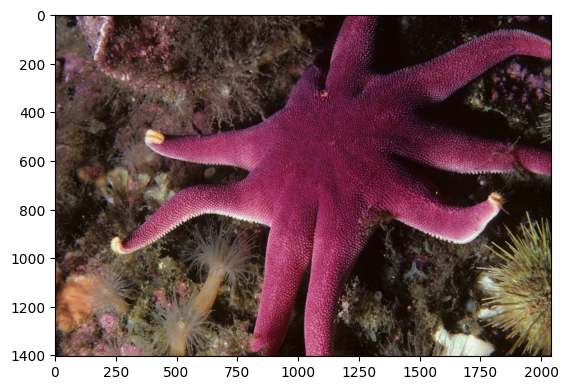

Shape of the image tensor: torch.Size([3, 1404, 2040])


In [ ]:
import torchvision
import torch
import matplotlib.pyplot as plt
import imageio

# Load the image using imageio.imread
a = imageio.imread("/root/tensorflow_datasets/downloads/extracted/ZIP.data.visi.ee.ethz.ch_cvl_DIV2_DIV2_trai_HRnQucRj9uNbbGLMapMO4iJPZws0wd-EGldnD5rPD2wzU.zip/DIV2K_train_HR/0001.png")

# Display the image
plt.imshow(a)
plt.show()

# Convert the image to a PyTorch tensor
img_tensor = torchvision.io.read_image("/root/tensorflow_datasets/downloads/extracted/ZIP.data.visi.ee.ethz.ch_cvl_DIV2_DIV2_trai_HRnQucRj9uNbbGLMapMO4iJPZws0wd-EGldnD5rPD2wzU.zip/DIV2K_train_HR/0001.png", mode=torchvision.io.ImageReadMode.RGB)

# Print the shape of the tensor
print("Shape of the image tensor:", img_tensor.shape)
